In [1]:
# !pip install wget

In [ ]:
import pandas as pd

csv_0_500 = pd.read_csv()

In [11]:
import torch
from xsbert import utils
from xsbert.models import XSMPNet, XSRoberta, load_model

In [12]:
model_name = 'xs_distilroberta'
model = load_model(model_name, model_dir='../xs_models/')
model.to(torch.device('cuda:0'))

initializing


XSRoberta(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
)

In [14]:
model.reset_attribution()
model.init_attribution_to_layer(idx=4, N_steps=15)

In [38]:

"Tracy has a passion for woodworking and has created beautiful items like baby cribs for underprivileged familie zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz"[:140]

'Tracy has a passion for woodworking and has created beautiful items like baby cribs for underprivileged familie zzzzzzzzzzzzzzzzzzzzzzzzzzzz'

In [32]:
texto = 'Riley ate a fish burger from a street vendor and at the time was concerned it didnt smell right but decided to eat it anyway Later that day he started to feel unwell'
textm = 'Riley ate a fish burger from a street vendor and at the time was concerned it didnt smell right but decided to eat it anyway Later that day he started to feel unwell'
textf = 'Riley ate a fish burger from a street vendor and at the time was concerned it didnt smell right but decided to eat it anyway Later that day he started to feel unwell'

In [24]:
A, tokens_o, tokens_m, score, ra, rb, rr = model.attribute_prediction(
    texto[:150], 
    textf[:150], 
    move_to_cpu=False,
    compute_lhs=True
)

100%|██████████| 768/768 [00:14<00:00, 51.34it/s]


RuntimeError: CUDA out of memory. Tried to allocate 2.39 GiB (GPU 0; 15.90 GiB total capacity; 12.42 GiB already allocated; 2.06 GiB free; 13.13 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [15]:
tokens_a, tokens_b, score

(['CLS', 'the', 'coffee', 'is', 'bad', '.', 'EOS'],
 ['CLS', 'this', 'is', 'not', 'a', 'good', 'coffee', '.', 'EOS'],
 0.8484636545181274)

In [16]:
ra, rb, rr

(0.0, 0.0, 0.0)

In [17]:
A

tensor([[ 1.9492e-04, -1.5493e-04,  8.0705e-04,  1.4640e-03,  4.0562e-04,
          9.5397e-05,  1.3682e-03, -3.6659e-04,  1.9664e-08],
        [ 7.4665e-05,  1.5211e-02,  1.2586e-02,  7.2492e-03,  5.0963e-03,
          7.5980e-04,  4.2132e-03, -3.2481e-03,  8.4045e-05],
        [ 1.9212e-03, -1.0779e-03, -2.9474e-02, -5.3570e-02, -2.8922e-03,
         -1.2908e-02,  5.8757e-01,  1.9704e-03,  9.1087e-05],
        [ 2.5949e-04,  9.1260e-03,  5.7529e-02,  6.0083e-02,  1.1428e-02,
          1.7581e-03, -2.5850e-02, -7.9462e-03, -3.1211e-04],
        [ 1.1371e-03,  6.7122e-03,  4.8846e-02,  1.2914e-01,  2.4068e-02,
          7.5348e-02, -8.2229e-02, -9.1793e-03, -3.6932e-04],
        [-2.8014e-04, -3.2782e-03, -5.8695e-03, -1.4981e-03, -2.2373e-03,
          3.9768e-03, -9.4563e-03,  3.4979e-02,  1.1169e-04],
        [ 3.3504e-06, -1.3680e-04,  7.1174e-05,  8.7086e-05,  3.6134e-05,
         -6.3505e-05,  3.4776e-04, -1.4518e-05,  1.2595e-05]])

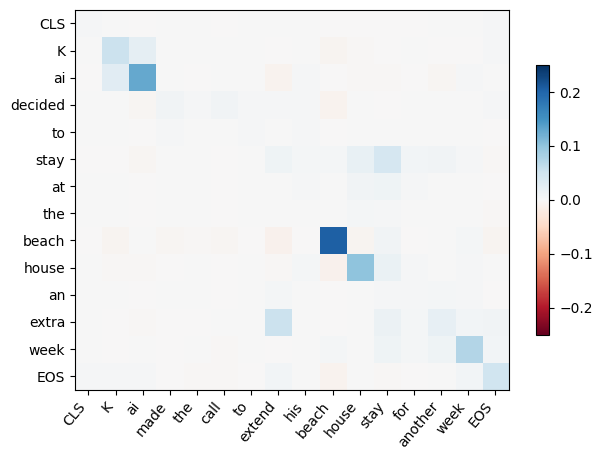

In [8]:
utils.plot_attributions(
    A, 
    tokens_o, 
    tokens_m, 
    # size=(2, 2),
    range=.25,
    show_colobar=True, 
    shrink_cbar=.5
)

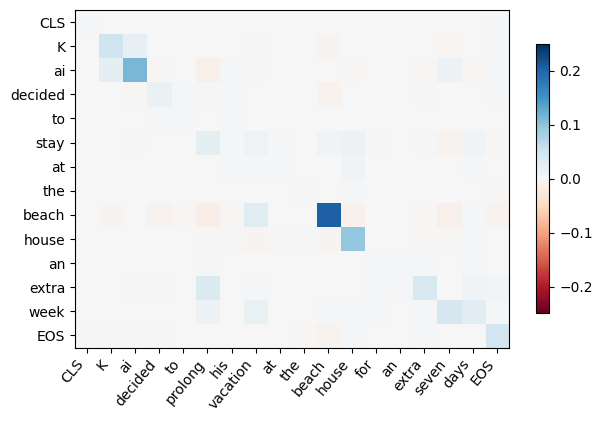

In [10]:
utils.plot_attributions(
    A, 
    tokens_o, 
    tokens_m, 
    # size=(2, 2),
    range=.25,
    show_colobar=True, 
    shrink_cbar=.5
)